In [6]:
import numpy as np
import pandas as pd
import random
from matplotlib import pyplot as plt
import time

data = pd.read_csv('data/train.csv')

In [7]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [8]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    print(Y.size, Y.max())
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [9]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2



In [10]:
start_time = time.time()
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 500)
print("--- %s seconds ---" % (time.time() - start_time))

41000 9
Iteration:  0
[6 8 6 ... 2 6 2] [5 0 7 ... 7 4 7]
0.0735609756097561
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
Iteration:  10
[2 8 3 ... 3 2 3] [5 0 7 ... 7 4 7]
0.10548780487804878
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
Iteration:  20
[2 8 3 ... 3 2 3] [5 0 7 ... 7 4 7]
0.1767560975609756
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
Iteration:  30
[2 8 3 ... 3 2 3] [5 0 7 ... 7 4 7]
0.22729268292682928
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
Iteration:  40
[2 8 3 ... 3 2 3] [5 0 7 ... 7 4 7]
0.279609756097561
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
Iteration:  50
[8 8 7 ... 3 2 3] [5 0 7 ... 7 4 7]
0.3348536585365854
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
41000 9
Iteration:  60
[4 8 7 ... 7 2 7] [5 0 7 ... 7 4 7]
0.3877317073170732
41000 9
41000 9
41000 

In [211]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


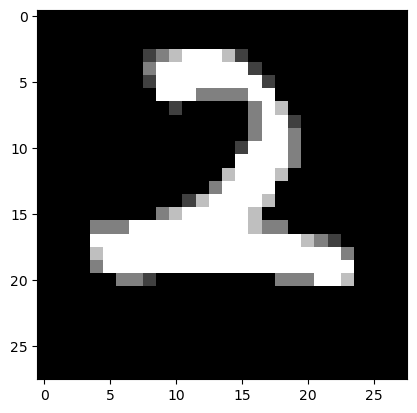

In [212]:
test_prediction(random.randrange(0, X_train.shape[1]), W1, b1, W2, b2)

In [213]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)


[6 8 9 1 9 1 6 3 1 6 1 2 3 4 9 4 3 7 9 1 2 1 1 0 1 8 4 4 6 2 4 9 6 2 7 4 9
 1 5 0 5 7 2 6 7 2 6 9 1 6 2 8 8 0 3 1 3 3 9 7 7 9 3 5 1 6 2 0 6 3 1 4 1 6
 9 6 1 4 1 2 2 2 6 2 9 9 9 9 6 1 5 3 3 7 0 5 6 5 0 9 1 4 7 1 6 1 2 9 2 2 8
 6 8 2 9 1 0 2 3 9 5 1 4 4 7 7 9 4 4 5 8 0 9 5 3 9 0 6 8 6 3 0 8 3 9 9 8 3
 3 9 6 2 8 8 4 1 3 7 5 8 2 8 4 9 9 2 8 9 1 6 4 6 2 0 3 6 0 3 6 8 0 3 8 4 0
 1 4 8 4 8 3 6 1 8 0 3 7 5 1 9 6 9 7 2 0 1 8 5 9 0 8 3 1 5 4 8 8 0 8 1 9 5
 7 2 0 1 0 6 6 1 8 2 4 5 7 3 1 1 1 1 3 9 8 3 7 7 2 5 2 3 9 6 6 3 1 3 5 1 0
 5 4 8 5 5 0 1 3 1 8 8 1 0 6 3 1 8 4 3 4 7 2 3 9 6 4 1 9 6 1 4 0 4 6 4 7 4
 1 3 8 3 8 6 6 7 8 2 6 0 2 4 9 2 0 7 7 9 8 6 4 5 5 4 7 8 8 1 5 9 8 8 7 0 8
 7 7 7 3 5 2 1 8 8 4 2 5 7 0 7 8 4 3 2 9 9 8 0 5 9 9 6 4 4 9 0 8 6 7 7 3 8
 5 1 7 9 7 0 1 2 4 1 6 5 1 9 7 1 5 0 2 6 6 4 9 2 7 3 6 5 5 3 8 6 8 9 4 6 4
 7 7 9 1 6 0 1 3 7 7 9 7 7 3 0 0 5 6 1 1 6 5 1 7 8 4 7 0 5 0 8 8 9 4 9 4 5
 6 6 7 5 1 0 2 3 5 3 2 4 2 4 6 4 6 8 0 1 0 1 8 3 5 6 2 4 7 2 0 4 1 7 4 4 5
 0 8 2 0 5 8 4 5 6 8 9 5 

0.84